En este experimento correremos kNN+PCA en el rango de alphas que queramos para ver y graficar la accuracy y performance de cada uno de ellos.
En nuestro caso corrimos este experimento con un el rango de alphas 1 a 50 y k fijo en 3.
Primero corremos un script para el build de las librerias de c++ como modulos de python.


In [114]:
!sh build.sh

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/martin/miniconda3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /home/martin/miniconda3/lib/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/martin/uba/metodos-numericos/metnum-tp2
-- Configuring done
-- Gen

Importamos librerias necesarias

In [115]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
import time
from pathlib import Path
from utils import get_MNIST
import matplotlib.pyplot as plt

Obtenemos el dataset de mnist, partido en 4/5 de entrenamiento y 1/5 de validacion. El mismo esta shuffleado sobre si mismo.

In [116]:
X_train, y_train, X_val, y_val = get_MNIST(0.8)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 56000 instancias de entrenamiento y 14000 de validación


Seteamos la cantidad de alphas a testear (siempre comenzando de 1) con k=3 ya que este maximiza la accuracy (visto en best_k_knn y mencionado en el informe)

In [117]:
alphas_a_testear = 50
k = 3

Ejecutamos el loop con k para cada alpha, guardamos los resultados en accuracy_con_pca y performance

In [118]:
accuracy_con_pca = []
performance = []
for alpha in range(1, alphas_a_testear):
    start =  time.process_time()

    pca = metnum.PCA(alpha)
    pca.fit(X_train)
    X_train_PCA = pca.transform(X_train)

    X_val_PCA = pca.transform(X_val)

    clf_metnum = metnum.KNNClassifier(k)
    clf_metnum.fit(X_train_PCA, y_train)
    acc = accuracy_score(clf_metnum.predict(X_val_PCA), y_val)
    end = time.process_time()

    time_performance = end - start
    accuracy_con_pca.append(acc)
    performance.append(time_performance)

In [119]:
for i in range(alphas_a_testear - 1):
    print("Alpha: {}. Accuracy: {}. Duration: {}".format(i, accuracy_con_pca[i], performance[i]))

Alpha: 0. Accuracy: 0.25735714285714284. Duration: 23.612096301000065
Alpha: 1. Accuracy: 0.3967857142857143. Duration: 22.52173800000014
Alpha: 2. Accuracy: 0.46285714285714286. Duration: 22.820377204999886
Alpha: 3. Accuracy: 0.6004285714285714. Duration: 23.961159265999868
Alpha: 4. Accuracy: 0.7292142857142857. Duration: 24.631137160000208
Alpha: 5. Accuracy: 0.8202857142857143. Duration: 26.632254217999844
Alpha: 6. Accuracy: 0.8681428571428571. Duration: 27.387215173999948
Alpha: 7. Accuracy: 0.8991428571428571. Duration: 29.09577717000002
Alpha: 8. Accuracy: 0.9142142857142858. Duration: 30.278617390000136
Alpha: 9. Accuracy: 0.9307857142857143. Duration: 27.004850970000007
Alpha: 10. Accuracy: 0.9397857142857143. Duration: 29.433402732000104
Alpha: 11. Accuracy: 0.9495714285714286. Duration: 27.385796610999932
Alpha: 12. Accuracy: 0.9562857142857143. Duration: 29.25598479999985
Alpha: 13. Accuracy: 0.9600714285714286. Duration: 28.387746331000017
Alpha: 14. Accuracy: 0.96121428

In [120]:
performance

[23.612096301000065,
 22.52173800000014,
 22.820377204999886,
 23.961159265999868,
 24.631137160000208,
 26.632254217999844,
 27.387215173999948,
 29.09577717000002,
 30.278617390000136,
 27.004850970000007,
 29.433402732000104,
 27.385796610999932,
 29.25598479999985,
 28.387746331000017,
 29.259768168000164,
 30.56337862999999,
 29.8336628699999,
 31.891052471999956,
 30.52913896600012]

Generamos un grafico mostrando el ratio accuracy/performance por cada alpha

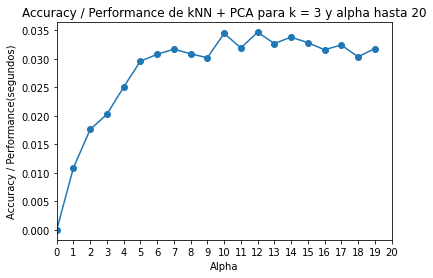

In [121]:
fn = np.insert(np.array(accuracy_con_pca) / np.array(performance), 0, 0)
plt.plot(fn, '-o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy / Performance(segundos)')
plt.xticks(range(alphas_a_testear+1))
plt.xlim(0)
plt.title(f'Accuracy / Performance de kNN + PCA para k = {k} y alpha hasta {alphas_a_testear}')
plt.show()

Generamos un grafico. Arriba, tenemos accuracy por cada alpha y abajo su performance.

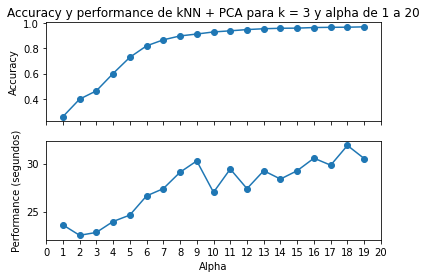

In [122]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(range(1, alphas_a_testear), accuracy_con_pca, '-o')
ax2.plot(range(1, alphas_a_testear), performance, '-o')
ax1.set_title(f'Accuracy y performance de kNN + PCA para k = {k} y alpha de 1 a {alphas_a_testear}')
ax2.set_xlabel('Alpha')
ax2.set_xticks(range(alphas_a_testear+1))
ax2.set_xlim(0)
ax2.set_ylabel('Performance (segundos)')
ax1.set_ylabel('Accuracy')
plt.show()